In [212]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [227]:
from proj1_helpers import *
from data_helpers import *
from cross_validation import *
from plots import *
from implementations import *

In [245]:
#LOAD TRAINING DATA
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [246]:
jet_samples_training = get_jet_samples(tX)


In [247]:
y = y[jet_samples_training[0]]
x = tX[jet_samples_training[0]]


In [231]:
degrees = range(1,20)

k_fold = 4
acc_training = []
acc_validation = []
lambda_ = 1e-3
seed= 1
for degree in degrees:
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_)
            
            acc_tr = predict_accuracy (y_train, x_train_aug, w)
            acc_val = predict_accuracy (y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))


/Users/Sofia/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


1 81.68087917367282 81.6718712466971
2 82.57900285584648 82.50960845544078
3 82.9610056850028 82.86792377292016
4 83.32032188325726 83.2122267595484
5 83.68564336616222 83.63259668508287
6 83.83844449782475 83.78272880134517
7 84.08566204927003 84.01893666426456
8 84.21410841540556 84.01593402193932
9 84.17140416900205 83.92285210985668
10 83.74969973576748 83.4744575226199
11 84.40260762804601 84.34922732004163
12 83.95154402540902 83.79674113219633
13 84.01059599113887 83.89282568660421
14 78.85539274561614 78.92545439987188
15 70.4499959964769 69.61726319160861
16 71.66673339205167 67.82969012731203
17 65.09228120746258 64.20449995996478
18 79.39286572183522 78.58015053246856
19 68.02886540155338 71.35879574025142


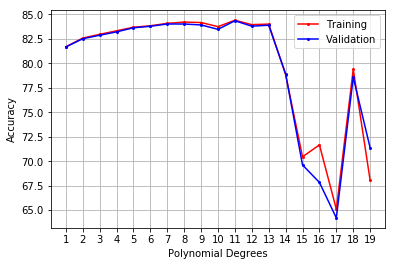

<Figure size 432x288 with 0 Axes>

In [240]:
plt.plot(degrees, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.plot(degrees, acc_validation, label='Validation', marker = "o", markersize = 2, color = "blue")
plt.grid()
plt.legend()
plt.xticks(degrees)
plt.xlabel("Polynomial Degrees")
plt.ylabel("Accuracy")
plt.show()
plt.savefig("build_poly_groupe_0_degre11")

In [248]:
lambdas = np.logspace(-10,-1,10)

k_fold = 4
acc_training = []
acc_validation = []
degree = 11
seed= 1
for ind_lambda,lambda_ in enumerate(lambdas):
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_)
            
            acc_tr = predict_accuracy (y_train, x_train_aug, w)
            acc_val = predict_accuracy (y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(lambda_, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

/Users/Sofia/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


KeyboardInterrupt: 